In [10]:
import geopandas as gpd
from geopandas.tools import sjoin
import pandas as pd
import requests
import json
from pprint import pprint
# from config import gkey
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
from itertools import compress

In [11]:
path='/Users/rafa/BootCamp/project1/'
bj_gdp=gpd.read_file(path+'shapes/conjunto_de_datos/09m.shp')

In [12]:
list(bj_gdp)

['CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB', 'CVE_MZA', 'TIPOMZA', 'geometry']

### We only keep the CVE Municipalities (Alcaldies) of our interest, in this Case '014' is Benito Juarez

In [13]:
bj_gdp=bj_gdp[bj_gdp['CVE_MUN']=='014']
bj_gdp.head()

,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,TIPOMZA,geometry
489,09,014,0001,0670,009,Contenedora,"POLYGON ((2799670.579 822251.186, 2799688.149 ..."
490,09,014,0001,0670,007,Típica,"POLYGON ((2799834.281 822469.899, 2799837.093 ..."
491,09,014,0001,101A,011,Típica,"POLYGON ((2798987.855 820943.380, 2799000.745 ..."
492,09,014,0001,0933,014,Típica,"POLYGON ((2796104.968 821291.041, 2796147.356 ..."
493,09,014,0001,0863,034,Típica,"POLYGON ((2798625.523 822013.924, 2798691.143 ..."


<AxesSubplot:>

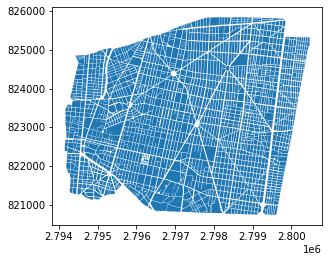

In [14]:
%matplotlib inline
bj_gdp.plot()

### Cleaning prices and finding lat and long

In [ ]:
# data=pd.read_csv(path+'TeamProject/clean_data.csv')

In [ ]:
# data.head()

In [ ]:
# data['price']=[int(i.replace(',','')) for i in data['price']]

In [ ]:
# data['lat']=''
# data['lng']=''

# for i in range(data.shape[0]):
    
#     # Build the endpoint URL
#     target_url = f'https://maps.googleapis.com/maps/api/geocode/json?address={data["adress"][i]}&key={gkey}'

#     geo_data = requests.get(target_url).json()

#     data['lat'][i] = geo_data["results"][0]["geometry"]["location"]["lat"]
#     data['lng'][i] = geo_data["results"][0]["geometry"]["location"]["lng"]

In [15]:
# data.to_csv('houses_gpd.csv',index=False)
data=pd.read_csv('data/BJCoords.csv')

In [16]:
data.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
data['price']=[int(i.replace(',','')) for i in data['price']]
data['price_m2']=data['price']/data['m2']

In [17]:
data.head()

,m2,state,rooms,price,status,adress,long,lat,price_m2
0,281,construidos,4 recs.,8500000,Casa en venta,"Lopez Cotilla , Del Valle Sur , Benito Juárez...",-99.168379,19.372810,30249.110320
1,423,construidos,NaN,17000000,Casa en venta,"Del Valle Centro , Benito Juárez , Distrito F...",-99.167713,19.379715,40189.125296
2,488,construidos,6 recs.,11495000,Casa en venta,"Xochicalco , Narvarte Poniente , Benito Juáre...",-99.154151,19.390451,23555.327869
3,389,construidos,5 recs.,11000000,Casa en venta,"Tajin 20 , Narvarte Poniente , Benito Juárez ...",-99.152377,19.402970,28277.634961
4,258,construidos,4 recs.,11400000,Casa en venta,"Porfirio Díaz 156 , Del Valle Centro , Benito...",-99.171952,19.381927,44186.046512


## Making lat & lon as geometry

In [18]:
geometry =[Point(xy) for xy in zip(data['long'],data['lat'])]
crs={'init':'epsg:4326'}
points_gpd=gpd.GeoDataFrame(data,crs=crs,geometry=geometry)

/Users/rafa/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [19]:
points_gpd.head()

,m2,state,rooms,price,status,adress,long,lat,price_m2,geometry
0,281,construidos,4 recs.,8500000,Casa en venta,"Lopez Cotilla , Del Valle Sur , Benito Juárez...",-99.168379,19.372810,30249.110320,POINT (-99.16838 19.37281)
1,423,construidos,NaN,17000000,Casa en venta,"Del Valle Centro , Benito Juárez , Distrito F...",-99.167713,19.379715,40189.125296,POINT (-99.16771 19.37972)
2,488,construidos,6 recs.,11495000,Casa en venta,"Xochicalco , Narvarte Poniente , Benito Juáre...",-99.154151,19.390451,23555.327869,POINT (-99.15415 19.39045)
3,389,construidos,5 recs.,11000000,Casa en venta,"Tajin 20 , Narvarte Poniente , Benito Juárez ...",-99.152377,19.402970,28277.634961,POINT (-99.15238 19.40297)
4,258,construidos,4 recs.,11400000,Casa en venta,"Porfirio Díaz 156 , Del Valle Centro , Benito...",-99.171952,19.381927,44186.046512,POINT (-99.17195 19.38193)


## We have to check if the Coordinate reference system (CRS) of both geodataframes are equal, if not, we have to set the equal

In [20]:
points_gpd.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
bj_gdp.crs

<Projected CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["MEXICO_ITRF_ ...>
Name: MEXICO_ITRF_2008_LCC
Axis Info [cartesian]:
- E[east]: Easting (Meter)
- N[north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: International Terrestrial Reference Frame 2008
- Ellipsoid: GRS_1980
- Prime Meridian: Greenwich

In [22]:
# Changing CRS in Benito Juarez
bj_gdp.to_crs('epsg:4326',inplace=True)

### Spatial join

In [23]:
points_gdp2=sjoin(points_gpd,bj_gdp,how='left')

<ipython-input-23-50ef5b8487da>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  points_gdp2=sjoin(points_gpd,bj_gdp,how='left')


In [24]:
# Finding if there are points outside the Alcaldia
bounderies=bj_gdp.geometry.bounds

In [25]:
list(bounderies)

['minx', 'miny', 'maxx', 'maxy']

In [31]:
min_x=bounderies['minx'].min()
min_y=bounderies['miny'].min()
max_x=bounderies['maxx'].max()
max_y=bounderies['maxy'].max()


In [26]:
cl=(~points_gdp2['CVE_ENT'].isna())

points_gdp2=points_gdp2[cl]

In [28]:
points_gdp2.head(1)

,m2,state,rooms,price,status,adress,long,lat,price_m2,geometry,index_right,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,TIPOMZA
0,281,construidos,4 recs.,8500000,Casa en venta,"Lopez Cotilla , Del Valle Sur , Benito Juárez...",-99.168379,19.37281,30249.11032,POINT (-99.16838 19.37281),32059.0,09,014,0001,0740,003,Típica


In [29]:
points_gdp2['id']=points_gdp2['CVE_MUN']+points_gdp2['CVE_LOC']+points_gdp2['CVE_AGEB']+points_gdp2['CVE_MZA']

In [33]:
cl=(points_gdp2['lat']>max_y)|(points_gdp2['lat']<min_y)|(points_gdp2['long']>max_x)|(points_gdp2['long']<min_x)
points_gdp2=points_gdp2[~cl]

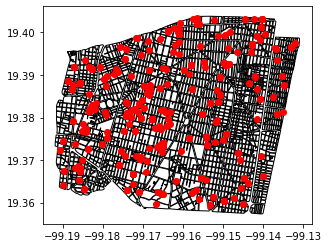

In [34]:
ax = bj_gdp.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
points_gdp2.plot(ax=ax, color='red')

plt.show()

In [19]:
points_gdp2['price_m2']=points_gdp2['price']/points_gdp2['m2']

In [82]:
list(points_gdp2)

['index',
 'm2',
 'state',
 'rooms',
 'price',
 'status',
 'adress',
 'lat',
 'lng',
 'geometry',
 'index_right',
 'CVE_ENT',
 'CVE_MUN',
 'CVE_LOC',
 'CVE_AGEB',
 'CVE_MZA',
 'TIPOMZA',
 'id',
 'price_m2']

In [42]:
points_gdp2.head(1)

,m2,state,rooms,price,status,adress,long,lat,price_m2,geometry,index_right,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,TIPOMZA,id
0,281,construidos,4 recs.,8500000,Casa en venta,"Lopez Cotilla , Del Valle Sur , Benito Juárez...",-99.168379,19.37281,30249.11032,POINT (-99.16838 19.37281),32059.0,09,014,0001,0740,003,Típica,01400010740003


### Loading Alcaldias attribures

In [64]:
attr=pd.read_csv('variables_and_percents/BJ_10_20.csv')

In [65]:
attr.head(1)

,Unnamed: 0,tiempo,nom_ent,mun,loc,ageb,mza,pobtot,p_0a2,p_60ymas,...,pct_0a2,pct_60,pct_wf,pct_t_inhab_hh,pct_privhh,pct_privhh_inhab,pct_hhtemp,pct_hh_car,pct_hh_pc,pct_hh_int
0,0,2010,Distrito Federal,14,1,0011,0,3900,124.0,567.0,...,3.179487,14.538462,46.240989,83.153348,94.762419,77.915767,3.671706,52.159827,58.36933,53.293737


In [66]:
def zero_plus(item,digits):
    i=str(item)
    zeros=digits-len(i)
    return zeros*'0'+i

In [67]:
attr['mun']=[zero_plus(i,3) for i in attr['mun']]
attr['loc']=[zero_plus(i,4) for i in attr['loc']]
attr['ageb']=[zero_plus(i,4) for i in attr['ageb']]
attr['mza']=[zero_plus(i,3) for i in attr['mza']]

### Benito Juarez es la 14

In [68]:
attr['id']='014'+attr['loc']+attr['ageb']+attr['mza']

In [69]:
attr.tail(2)

,Unnamed: 0,tiempo,nom_ent,mun,loc,ageb,mza,pobtot,p_0a2,p_60ymas,...,pct_60,pct_wf,pct_t_inhab_hh,pct_privhh,pct_privhh_inhab,pct_hhtemp,pct_hh_car,pct_hh_pc,pct_hh_int,id
4386,4386,2020,Ciudad de MÃ©xico,014,0001,1024,025,124,NaN,34.0,...,27.419355,55.384615,90.909091,100.0,90.909091,NaN,61.363636,81.818182,86.363636,01400011024025
4387,4387,2020,Ciudad de MÃ©xico,014,0001,1024,026,97,4.0,28.0,...,28.865979,56.363636,81.818182,100.0,81.818182,9.090909,38.636364,72.727273,75.000000,01400011024026


### Merge metros cubicos attributes and INEGI attributes

In [70]:
price_mz=points_gdp2[['id','price_m2']].groupby('id',as_index=False).mean()

In [71]:
data=price_mz[['id','price_m2']].merge(attr,on='id',how='left')

In [72]:
data.head(2)

,id,price_m2,Unnamed: 0,tiempo,nom_ent,mun,loc,ageb,mza,pobtot,...,pct_0a2,pct_60,pct_wf,pct_t_inhab_hh,pct_privhh,pct_privhh_inhab,pct_hhtemp,pct_hh_car,pct_hh_pc,pct_hh_int
0,01400010011006,4306.580556,6.0,2010.0,Distrito Federal,014,0001,0011,006,226.0,...,3.539823,15.486726,38.947368,NaN,NaN,NaN,NaN,42.342342,47.747748,42.342342
1,01400010011006,4306.580556,2200.0,2020.0,Ciudad de MÃ©xico,014,0001,0011,006,215.0,...,1.860465,22.325581,47.407407,89.07563,89.915966,78.991597,2.521008,36.974790,68.907563,70.588235


In [73]:
data.drop(columns=['nom_ent',
                   'Unnamed: 0',
                   'nom_ent',
                   'mun',
                   'loc',
                   'ageb',
                   'mza'],inplace=True)

In [74]:
data.to_csv('data/BJ_to_model.csv',index=False)